In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk

In [78]:
df = pd.read_csv('spam.csv')
df.shape

(5572, 5)

<h3 align="center">Data Cleaning</h3>

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [80]:
# drop last 3 rows
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [81]:
# renaming the col names
df.columns = ['target', 'text']
df.sample(5)

,target,text
4755,ham,Don't make life too stressfull.. Always find t...
44,ham,Great! I hope you like your man well endowed. ...
3497,ham,You said to me before i went back to bed that ...
4881,ham,As usual u can call me ard 10 smth.
1527,ham,No screaming means shouting..


In [82]:
df.iloc[:, 0] = LabelEncoder().fit_transform(np.array(df.iloc[:, 0]))
df.sample(5)

,target,text
3783,0,Dear got train and seat mine lower seat
2953,0,Think i might have to give it a miss. Am teach...
4078,0,O i played smash bros &lt;#&gt; religiously.
5298,0,I.ll hand her my phone to chat wit u
1558,0,Message from . I am at Truro Hospital on ext. ...


In [83]:
# check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [84]:
#check for duplicate values
df.duplicated().sum()

403

In [85]:
#remove duplicate
df.drop_duplicates(keep='first', inplace=True)
df.shape

(5169, 2)

<h3 align='center'>Exploratory Data Analysis</h3>

In [86]:
# count no of spams and no of hams
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

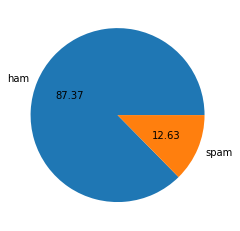

In [87]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [88]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [89]:
df['num_characters'] = df['text'].apply(len)
df.sample(5)

,target,text,num_characters
3250,0,"I���ll leave around four, ok?",29
4058,1,Moby Pub Quiz.Win a �100 High Street prize if ...,154
3845,0,Pls go there today &lt;#&gt; . I dont want an...,55
4719,0,Forgot to tell �_ smth.. Can �_ like number th...,79
5112,1,December only! Had your mobile 11mths+? You ar...,159


In [90]:
# no of words column
df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_characters,word_count
3025,0,I finished my lunch already. U wake up already?,47,11
3557,0,No da. . Vijay going to talk in jaya tv,39,11
1706,0,Yes! I am a one woman man! Please tell me your...,75,19
5528,0,Its just the effect of irritation. Just ignore it,49,10
324,0,No problem. How are you doing?,30,8


In [91]:
df['sentence_count'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_characters,word_count,sentence_count
2646,0,"Em, its olowoyey@ usc.edu have a great time in...",107,22,2
3122,0,He telling not to tell any one. If so treat fo...,59,16,2
4261,0,You'll never believe this but i have actually ...,69,15,2
4262,0,Den only weekdays got special price... Haiz......,141,30,1
3423,1,Am new 2 club & dont fink we met yet Will B gr...,160,30,1


In [92]:
df[['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [93]:
# statistical analysis for ham messages
df[df['target'] == 0][['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [94]:
# statistical analysis for spam messages
df[df['target'] == 1][['num_characters', 'word_count', 'sentence_count']].describe()

,num_characters,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

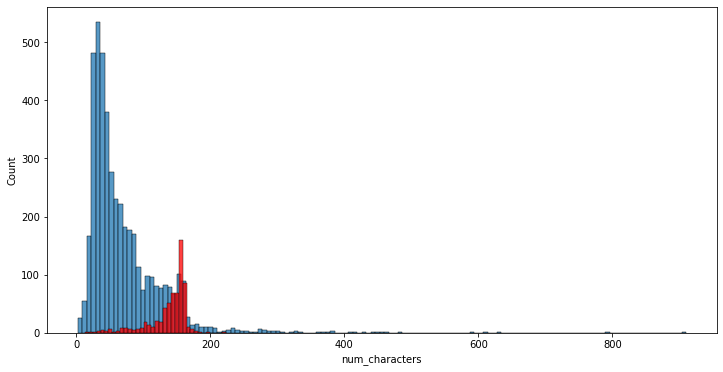

In [95]:
#plot the difference between ham and spam
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='r')

<AxesSubplot:xlabel='word_count', ylabel='Count'>

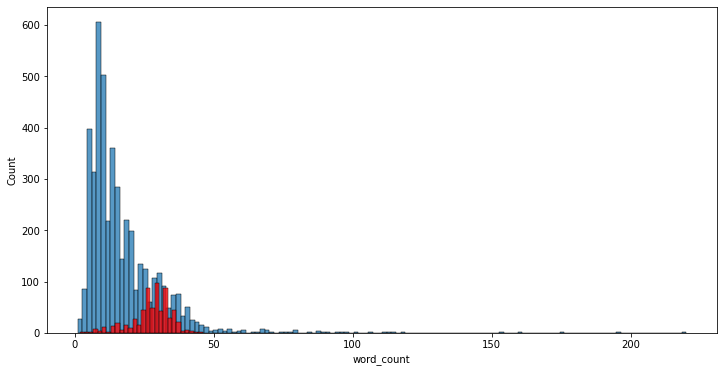

In [96]:
#plot the difference between ham and spam
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['word_count'])
sns.histplot(df[df['target'] == 1]['word_count'], color='r')

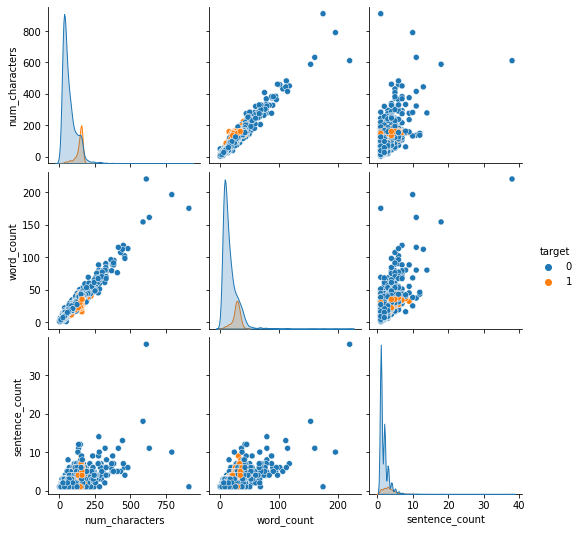

In [97]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

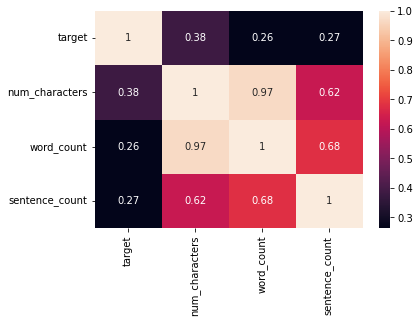

In [98]:
sns.heatmap(df.corr(), annot=True)

# corr for num_characters and target is highest which implies, the tendency for the target to move towards being spam is more when num_characters increases

<h3 align="center">Text Preprocessing</h3>

Steps:
1. Lower Case
2. Tokenization
3. Removing Special Characters
4. Stemming 
<!-- Stemming or Lemmatizing -->
> sort so as to group together inflected or variant forms of the same word
5. Removing Stop words and punctuation
>top words means those words which is used in sentence formation but doesn't have any significance contribution in the overall meaning of the sentence

In [99]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [100]:
from string import punctuation

In [101]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [102]:
def transform_text(text):
    text = text.lower() # step1
    text = nltk.word_tokenize(text) # tokenize
    y = list()
    # removing special Characters
    for i in text:
        if(i.isalnum()):
            y.append(i)
    text = y.copy()
    y.clear()
    # removing stop words
    for i in text:
        if i not in stopwords.words('english') and i not in punctuation:
            y.append(i)
    text = y.copy()
    y.clear()
    #  stemming
    for i in text:
        y.append(ps.stem(i))
    text = y.copy()
    y.clear()
    return ' '.join(text)

In [ ]:
pickle.dump

In [103]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [104]:
df['transformed_text'] = df['text'].apply(transform_text)

In [105]:
df.head(4)

,target,text,num_characters,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [106]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white', collocations=False)
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

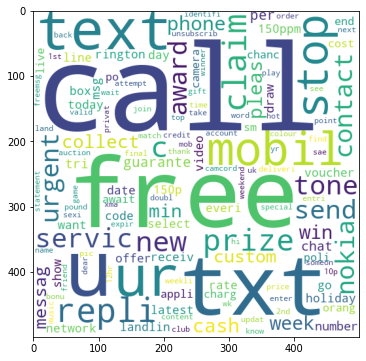

In [107]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

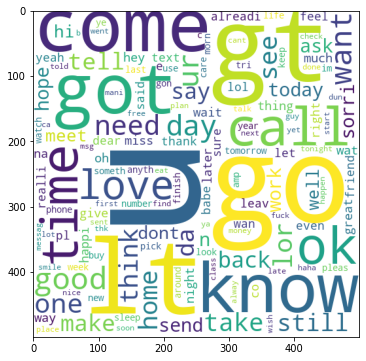

In [108]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [109]:
# top 30 words of each category
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split(' '):
        spam_corpus.append(word)
len(spam_corpus)

9941

In [110]:
from collections import Counter
common_spam_words = Counter(spam_corpus).most_common(30)
common_spam_words = pd.DataFrame(common_spam_words)
common_spam_words.columns = ['Words', 'Frequency']
common_spam_words

,Words,Frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


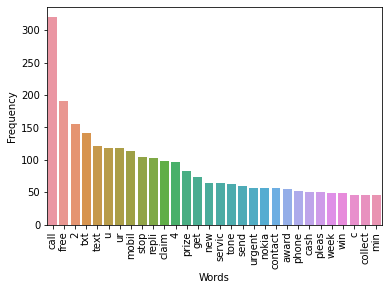

In [111]:
sns.barplot(data=common_spam_words, x='Words', y='Frequency')
# plt.xticks(rotation=45)
plt.xticks(rotation='vertical')
plt.show()

In [112]:
# top 30 words of each category
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split(' '):
        ham_corpus.append(word)
len(ham_corpus)

35314

In [113]:
from collections import Counter
common_ham_words = Counter(ham_corpus).most_common(30)
common_ham_words = pd.DataFrame(common_ham_words)
common_ham_words.columns = ['Words', 'Frequency']
common_ham_words

,Words,Frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


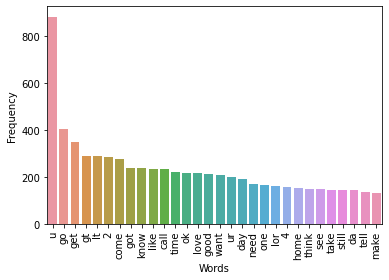

In [114]:
sns.barplot(data=common_ham_words, x='Words', y='Frequency')
# plt.xticks(rotation=45)
plt.xticks(rotation='vertical')
plt.show()

<h3 align="center">Model Building</h3>

In [115]:
# naive bias is considered to the best for textual based models
# we have to convert the transformed_text to vectors also called as vectorization

# the methods commonly used are: bag of words, tf-idf, etc.
# link: https://www.youtube.com/watch?v=vo6gQz5lYRI

In [207]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [208]:
x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [209]:
y = df['target'].values

In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [212]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [213]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [214]:
# for tfidf
gnb.fit(x_train, y_train)
y_pred_1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_1))
print(confusion_matrix(y_test, y_pred_1))
print(precision_score(y_test,  y_pred_1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [215]:
mnb.fit(x_train, y_train)
y_pred_2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_2))
print(confusion_matrix(y_test, y_pred_2))
print(precision_score(y_test, y_pred_2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [216]:
bnb.fit(x_train, y_train)
y_pred_3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_3))
print(confusion_matrix(y_test, y_pred_3))
print(precision_score(y_test, y_pred_3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [217]:
# import some classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [218]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [219]:
clf = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DTC': dtc,
    'LRC': lrc,
    'RFC': rfc,
    'ABC': abc,
    'BC': bc,
    'ETC': etc,
    'GBC': gbc,
    'XGB': xgb,
}

In [220]:
def train_classifier(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [226]:
train_classifier(mnb,x_train,x_test,y_train,y_test)

(0.971953578336557, 1.0)

In [222]:
accuracyScore = []
precisionScore = []
for name, clfs in clf.items():
    accuracy, precision = train_classifier(clfs, x_train, x_test, y_train,y_test)
    print("For: ", name)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    accuracyScore.append(accuracy)
    precisionScore.append(precision)

For:  SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For:  KN
Accuracy:  0.9052224371373307
Precision:  1.0
For:  NB
Accuracy:  0.971953578336557
Precision:  1.0
For:  DTC
Accuracy:  0.9313346228239845
Precision:  0.8252427184466019
For:  LRC
Accuracy:  0.9564796905222437
Precision:  0.9696969696969697
For:  RFC
Accuracy:  0.9748549323017408
Precision:  0.9827586206896551
For:  ABC
Accuracy:  0.9613152804642167
Precision:  0.9454545454545454
For:  BC
Accuracy:  0.9593810444874274
Precision:  0.8692307692307693
For:  ETC
Accuracy:  0.9796905222437138
Precision:  0.975609756097561
For:  GBC
Accuracy:  0.9468085106382979
Precision:  0.9278350515463918
For:  XGB
Accuracy:  0.9680851063829787
Precision:  0.9338842975206612


In [223]:
performance_df = pd.DataFrame({'Algorithm': clf.keys(), 'accuracyScores': accuracyScore, 'precisionScores': precisionScore})
performance_df.sort_values(by='precisionScores', ascending=False)

,Algorithm,accuracyScores,precisionScores
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RFC,0.974855,0.982759
8,ETC,0.979691,0.975610
0,SVC,0.975822,0.974790
4,LRC,0.956480,0.969697
6,ABC,0.961315,0.945455
10,XGB,0.968085,0.933884
9,GBC,0.946809,0.927835
7,BC,0.959381,0.869231


In [225]:
# model improvement using 3000 features
# naive bais performed better

# tried the model with Voting Classifier, didn't work, with Stacking, didn't work
# tried with scaling didn't work

# all this process comes under Model Improvement

In [234]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))